## Human Activity Recognition Using Smartphones

The experiments were carried out with a group of 30 volunteers (19-48 years old). All the participants were wearing a smartphone (Samsung Galaxy S II) on the waist during the experiment execution. 
They performed a protocol of activities composed of six basic activities: three static postures (STANDING, SITTING, LYING) and three dynamic activities (WALKING, WALKING-DOWNSTAIRS and WALKING-UPSTAIRS). 
The experiment also included postural transitions that occurred between the static postures. 
These are: stand-to-sit, sit-to-stand, sit-to-lie, lie-to-sit, stand-to-lie, and lie-to-stand.

Values captured:
- 3-axial linear acceleration (at a constant rate of 50Hz)
- 3-axial angular velocity (at a constant rate of 50Hz)
using the embedded accelerometer and gyroscope of the device. 
- a 561 feature vector wit time and frequency domain variables
- its activity label
- ID subject

The experiments were video-recorded to label the data manually.
The obtained dataset was randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data. 

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window).

The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. 

The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used.

From each window, a vector of 561 features was obtained by calculating variables from the time and frequency domain. 

## Data understanding and Preparation

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from collections import defaultdict

In [2]:
#uploading training-dataset
train = pd.read_csv("train.csv")

In [3]:
train.shape

(7352, 563)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [5]:
#checking for missing values (Nan)
train.isnull().values.any()

False

In [6]:
#checking for null values
print("Null values in DataFrame:{}\n".format(train.isna().sum().sum()))
train.info()

Null values in DataFrame:0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [7]:
train['Activity'].value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [8]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [9]:
pd.crosstab(train.subject, train.Activity)

Activity,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
subject,,,,,,
1,50,47,53,95,49,53
3,62,52,61,58,49,59
5,52,44,56,56,47,47
6,57,55,57,57,48,51
7,52,48,53,57,47,51
8,54,46,54,48,38,41
11,57,53,47,59,46,54
14,51,54,60,59,45,54
15,72,59,53,54,42,48


In [10]:
sub21 = train.loc[train['subject']==21]
sub21

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
3965,0.245350,-0.025551,-0.233971,-0.847169,-0.805181,-0.717554,-0.893054,-0.821622,-0.692363,-0.848497,...,-0.440427,-0.015173,-0.289105,-0.588349,0.051690,-0.658107,0.306648,0.130139,21,STANDING
3966,0.319396,-0.009461,-0.134561,-0.967056,-0.927182,-0.756431,-0.971948,-0.930643,-0.741793,-0.884521,...,0.384014,-0.457228,0.284724,-0.525611,0.834287,-0.631113,0.310777,0.159743,21,STANDING
3967,0.280378,-0.009429,-0.078623,-0.954289,-0.817761,-0.875920,-0.963722,-0.844335,-0.875082,-0.889850,...,-0.086438,0.166681,0.057764,0.628871,-0.734367,-0.632521,0.305594,0.165904,21,STANDING
3968,0.277186,-0.021057,-0.088045,-0.952402,-0.775237,-0.860402,-0.962399,-0.799558,-0.855087,-0.889850,...,-0.530977,0.075160,0.184325,-0.017363,-0.937170,-0.641088,0.304133,0.157569,21,STANDING
3969,0.285473,-0.024408,-0.086753,-0.978880,-0.866417,-0.910604,-0.984322,-0.882104,-0.912848,-0.903619,...,0.020834,-0.099957,-0.017790,-0.241290,0.819461,-0.643430,0.306376,0.150995,21,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4368,0.250338,-0.007885,-0.150313,-0.177580,0.258784,-0.188974,-0.226644,0.187805,-0.188733,0.079440,...,-0.737437,0.123330,0.873136,-0.855289,-0.432583,-0.493410,0.375418,0.228106,21,WALKING_UPSTAIRS
4369,0.257712,-0.018160,-0.204960,-0.178424,0.181706,-0.113811,-0.200502,0.179131,-0.103848,-0.254639,...,-0.845985,-0.117746,-0.457890,-0.886694,0.344509,-0.484162,0.374651,0.239207,21,WALKING_UPSTAIRS
4370,0.281083,-0.029388,-0.168461,-0.221789,0.156077,-0.174932,-0.244764,0.130234,-0.169352,-0.254639,...,-0.776532,-0.302303,0.754616,-0.858115,0.301700,-0.447884,0.389567,0.258429,21,WALKING_UPSTAIRS
4371,0.238773,0.004982,-0.048661,-0.276586,0.081628,-0.235687,-0.317769,-0.000447,-0.211686,-0.213089,...,-0.970143,0.548837,-0.049975,0.415527,0.448065,-0.432902,0.397533,0.263932,21,WALKING_UPSTAIRS


[]

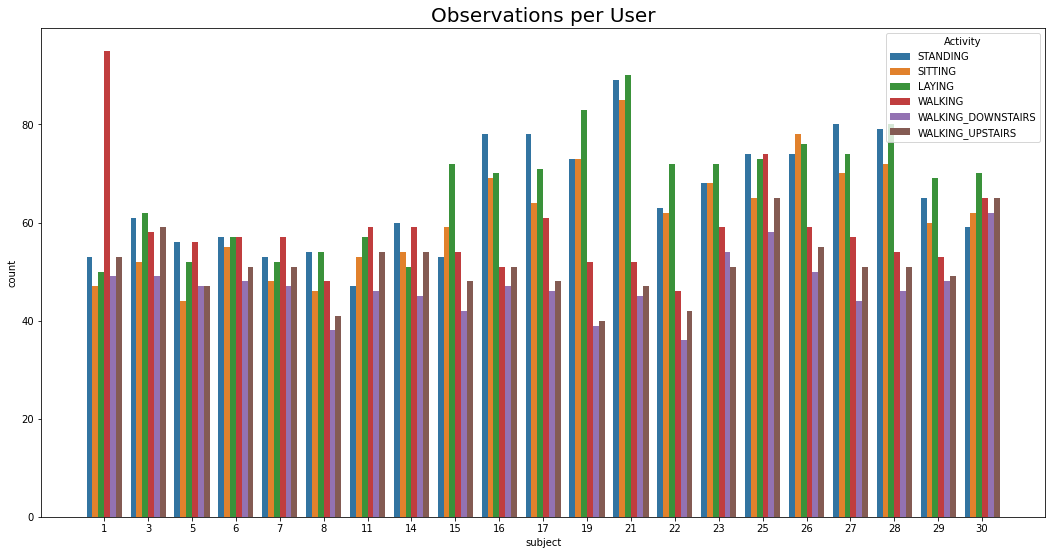

In [14]:
# number of activities for each subject
sns.color_palette("husl")

plt.figure(figsize=(18,9))
plt.title('Observations per User', fontsize=20)
sns.countplot(x='subject', hue='Activity', data=train)
plt.plot()

C:\Users\Jenni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


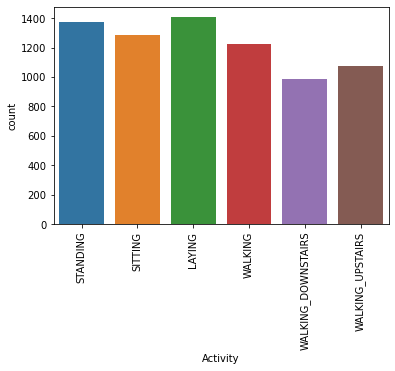

In [15]:
#Let's check number of observations per label
sns.countplot(train.Activity)
sns.color_palette("husl")
plt.xticks(rotation=90)
plt.show()

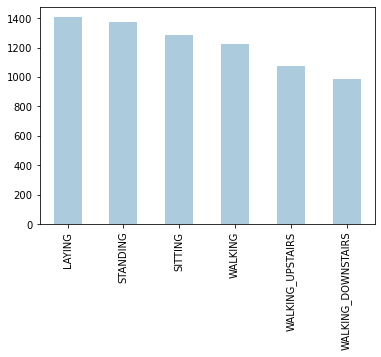

In [19]:
train['Activity'].value_counts().plot(kind='bar')
plt.show()


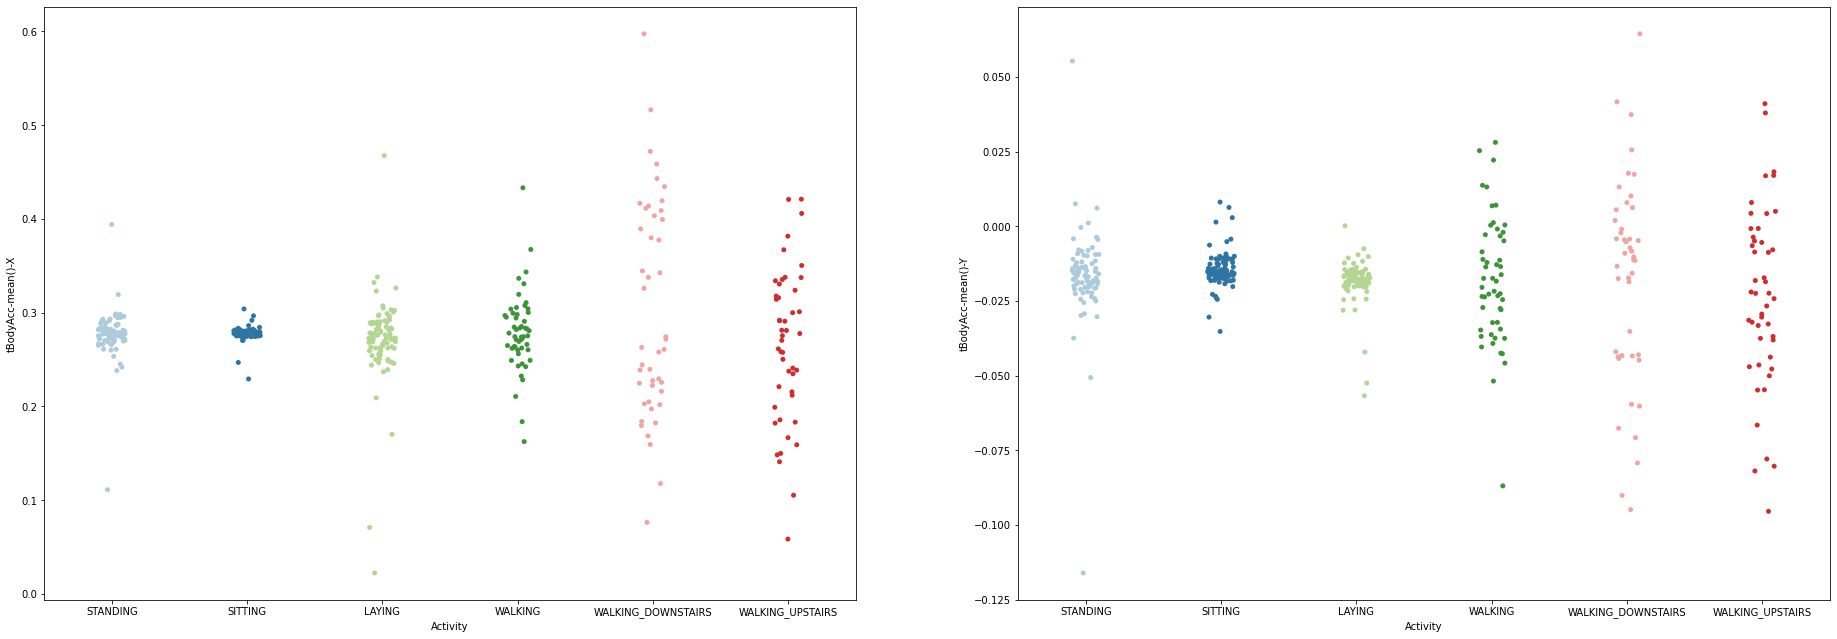

In [33]:
fig = plt.figure(figsize=(32,24))
ax1 = fig.add_subplot(221)
ax1 = sns.stripplot(x='Activity', y=sub21.iloc[:,0], data=sub21, jitter=True)
ax2 = fig.add_subplot(222)
ax2 = sns.stripplot(x='Activity', y=sub21.iloc[:,1], data=sub21, jitter=True)
plt.show()
# So, the mean body acceleration is more variable for walking activities than for passive ones especially in the X direction. 


In [11]:
#n_Activity= ({'WALKING':1, 'WALKING_UPSTAIRS':2, 'WALKING_DOWNSTAIRS':3,'SITTING':4, 'STANDING':5, 'LAYING':6})

In [12]:
#train["n_Activity"] =  n_Activity.values()

In [41]:
# Removing (), - and , from column name
columns = train.columns
columns = columns.str.replace('[()]', '')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]', '')

train.columns = columns
# Displaying new names

train.columns

<ipython-input-41-4e02aef77f73>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  columns = columns.str.replace('[()]', '')
<ipython-input-41-4e02aef77f73>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  columns = columns.str.replace('[-]', '')
<ipython-input-41-4e02aef77f73>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  columns = columns.str.replace('[,]', '')


Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'fBodyBodyGyroJerkMagkurtosis', 'angletBodyAccMeangravity',
       'angletBodyAccJerkMeangravityMean', 'angletBodyGyroMeangravityMean',
       'angletBodyGyroJerkMeangravityMean', 'angleXgravityMean',
       'angleYgravityMean', 'angleZgravityMean', 'subject', 'Activity'],
      dtype='object', length=563)

### Analyzing activities (classes)
There are **static** activities (SITTING, STANDING, LAYING) and **dynamic** (WALKING, WALKING-UPSTAIRS, WALKING-DOWNSTAIRS) ones

C:\Users\Jenni\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Jenni\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Jenni\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

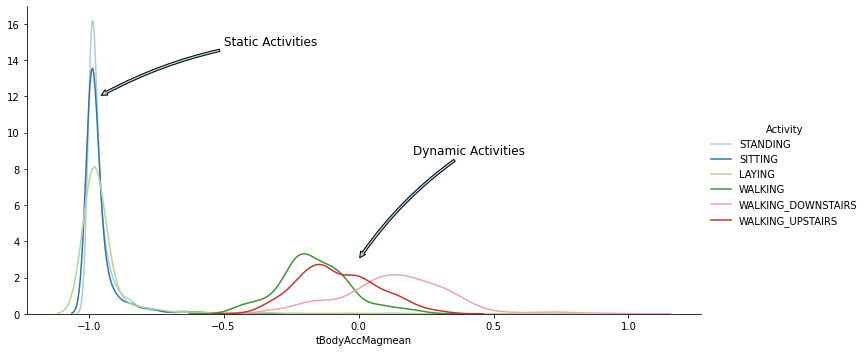

In [17]:
sns.set_palette("Paired", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='Activity', height=5,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False)\
    .add_legend()
plt.annotate("Static Activities", xy=(-0.960,12), xytext=(-0.5, 15), size=12,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Dynamic Activities", xy=(0,3), xytext=(0.2, 9), size=12,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

<Figure size 864x864 with 0 Axes>

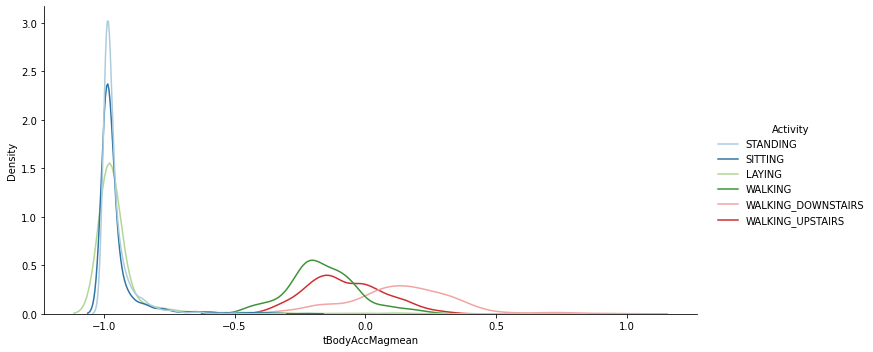

In [18]:
plt.figure(figsize=(12,12))
sns.color_palette("Paired")
sns.displot(train, x ='tBodyAccMagmean', hue= "Activity", kind="kde", height=5,aspect=2)
plt.show()

In [20]:
body_acc_en= train.columns[16:19].tolist()
body_grav_en= train.columns[56:59].tolist()

#### checking correlations

In [42]:
corrMatrix = train[[el for el in body_acc_en+body_grav_en]].corr()

<Figure size 1080x576 with 0 Axes>

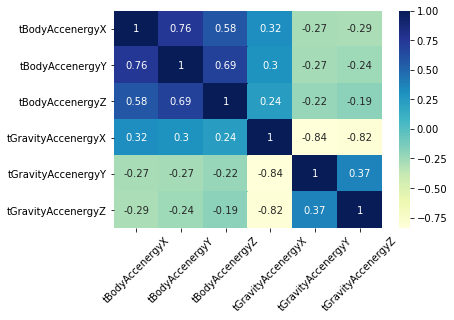

<Figure size 1080x576 with 0 Axes>

In [43]:
h = sns.heatmap(corrMatrix, annot=True, cmap="YlGnBu")
h.set_xticklabels(h.get_xticklabels(), rotation=45)
plt.figure(figsize = (15,8))

#### Magnitude of accelearation

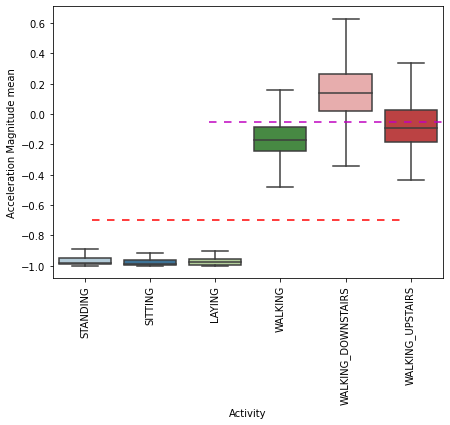

In [44]:
plt.figure(figsize=(7,5))
sns.color_palette("Paired")
sns.boxplot(x='Activity', y='tBodyAccMagmean',data=train, showfliers=False)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='r')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

#### Position of Gravity Acceleration Componants

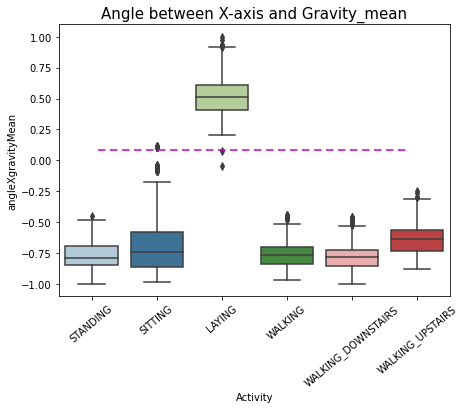

In [45]:
#angle x
plt.figure(figsize=(7,5))
sns.color_palette("Paired")
sns.boxplot(x='Activity', y='angleXgravityMean', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

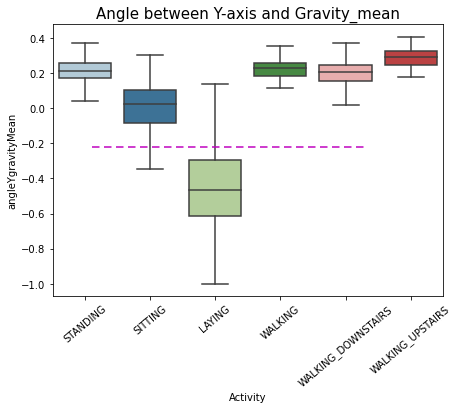

In [46]:
#angle y
plt.figure(figsize=(7,5))
sns.color_palette("Paired")
sns.boxplot(x='Activity', y='angleYgravityMean', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

In [47]:
from collections import Counter

### Data Partitioning

In [48]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

## kNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier

## visualization